# Written by Federica B. Bianco @fedhere
# for NYU CUSP PUI
# This is my example of Assignment 2, Phase 1 and 2.
# For Assignment 2 you should design your own investigation into the citibike data.
- # Come up with a question about the Citibike data usage. It can be anything that involves Categorical data. 
    # At this point of the class it is easier to run tests of proportions or similar, and work with categorical data. Categorical cn be anhything that can be punt into classes (e.g. day/night, male/female, 2014/2015/2016.... as long as you set up your experiment the proper way!)
- # Choose the significance threshold
- # Clearly state they Null and Alternate hypothesis
- # Wrangle the data so that it is ready for your analysis.

In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

import os
import csv
df = pd.read_csv('/gws/open/Student/citibike/201707-citibike-tripdata.csv.zip')
# pl.rcParams.update(s)


Populating the interactive namespace from numpy and matplotlib


In [2]:
df.head(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,364,2017-07-01 00:00:00,2017-07-01 00:06:05,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,14744,Subscriber,1986.0,1
1,2142,2017-07-01 00:00:03,2017-07-01 00:35:46,293,Lafayette St & E 8 St,40.730207,-73.991026,3425,2 Ave & E 104 St,40.789210,-73.943708,19587,Subscriber,1981.0,1
2,328,2017-07-01 00:00:08,2017-07-01 00:05:37,3242,Schermerhorn St & Court St,40.691029,-73.991834,3397,Court St & Nelson St,40.676395,-73.998699,27937,Subscriber,1984.0,2
3,2530,2017-07-01 00:00:11,2017-07-01 00:42:22,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,26066,Subscriber,1985.0,1
4,2534,2017-07-01 00:00:15,2017-07-01 00:42:29,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,29408,Subscriber,1982.0,2


In [ ]:
# IDEA:
## Women are less likely than men to ride less duration of biking

# NULL HYPOTHESIS:
## The frequency of women's duration biking time  is _the same_ or _higher_  than the ratio of men's duration of biking biking time.

# _$H_0$_ : $\frac{W_{\mathrm{man}}}{W_{\mathrm{women}}} <= \frac{M_{\mathrm{}}}{M_{\mathrm{week}}}$
# _$H_1$_ : $\frac{W_{\mathrm{weekend}}}{W_{\mathrm{week}}} > \frac{M_{\mathrm{weekend}}}{M_{\mathrm{week}}}$

or identically:

# _$H_0$_ : $\frac{W_{\mathrm{weekend}}}{W_{\mathrm{week}}} - \frac{M_{\mathrm{weekend}}}{M_{\mathrm{week}}} <= 0 $
# _$H_1$_ : $\frac{W_{\mathrm{weekend}}}{W_{\mathrm{week}}} - \frac{M_{\mathrm{weekend}}}{M_{\mathrm{week}}} > 0$
## I will use a significance level  $\alpha=0.05$

#### which means i want the probability of getting a result at least as significant as mine to be less then 5%

## I am starting with a single month of data:  reading data from citibike csv file from Jan 2015

what I want is the date and time of the beginning of each trip. pandas has an easy method to read csv files, and an easy method to convert strinds to dates.

if i read a csv file with pandas the content is stored in a "DataFrame". You can think of it as a python dictionary in many ways,but it has many added capabilities: it is easy to convert variables within it, it knows how to plot itself, etc.

### download and move  data to PUIDATA
# NOTE: 
# 1. access to data from within the notebook _is required_
# 2. if data is downloaded it _must_ be stored in a directory pointed to by the environmental variable PUIDATA

In [3]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [4]:
df.drop(['starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype','birth year'], axis=1, inplace=True)

In [5]:
df.head()

,tripduration,gender
0,364,1
1,2142,1
2,328,2
3,2530,1
4,2534,2


In [6]:
# outliner(>0.95) of the data is cleaned

In [7]:
df.tripduration.quantile(0.95)

2184.0

In [8]:
df2 = df[df.tripduration < df.tripduration.quantile(0.95)]

In [9]:
df2.head(5)

,tripduration,gender
0,364,1
1,2142,1
2,328,2
5,545,2
6,1496,1


In [10]:
df2.shape

(1648794, 2)

### Lets separate males (_m) from females (_w) to test the hypotheses.
### In this csv file gender == 1 is male, gender == 2 is female

### Lets plot the frequency over tripduration(s)

In [11]:
df3 = df2[df2.gender != 0]

In [12]:
bins = [0,300,600,900,1200,1500,1800,2100,2400]
groups = df3.groupby(['gender', pd.cut(df3.tripduration, bins)])
groups.size().unstack()

tripduration,"(0, 300]","(300, 600]","(600, 900]","(900, 1200]","(1200, 1500]","(1500, 1800]","(1800, 2100]","(2100, 2400]"
gender,,,,,,,,
1,201443,362109,212404,122027,77904,50830,30851,6137
2,49142,118625,83276,52518,36033,24678,15336,3118


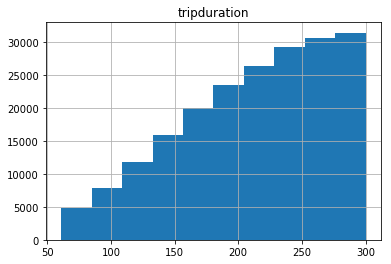

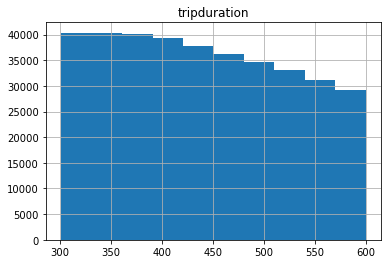

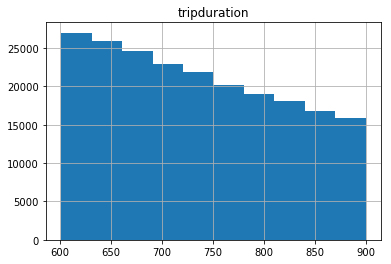

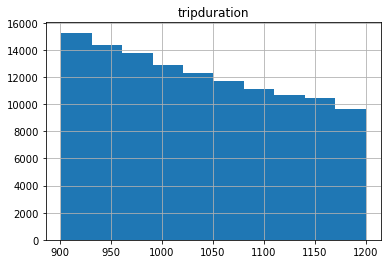

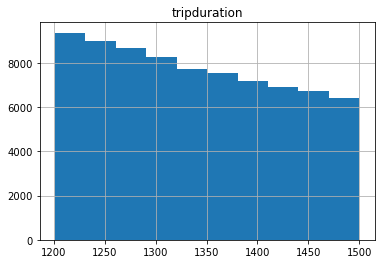

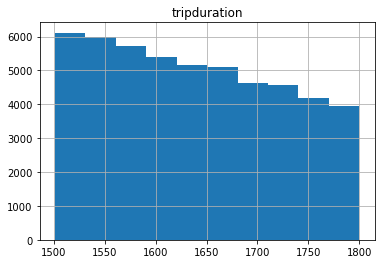

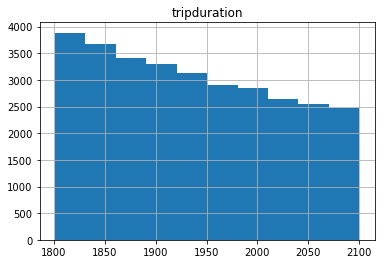

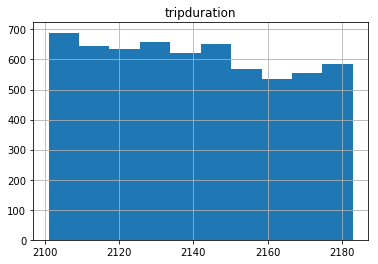

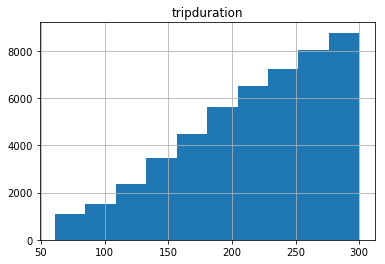

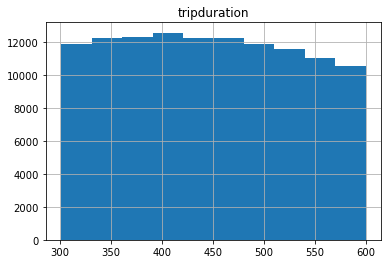

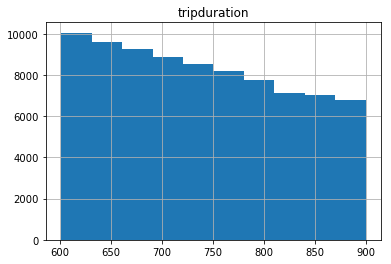

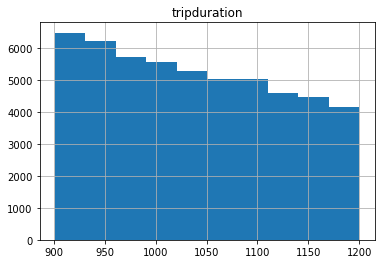

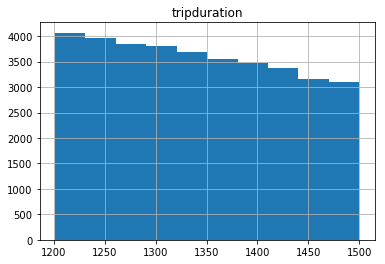

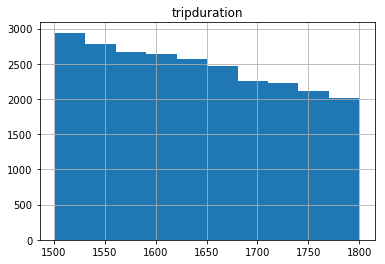

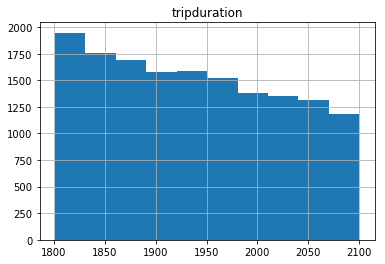

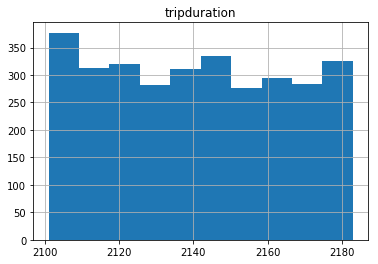

In [13]:
groups.hist(x=groups.gender);


## Fig.1 Histograme of trip duration against men and women in July, 2017   

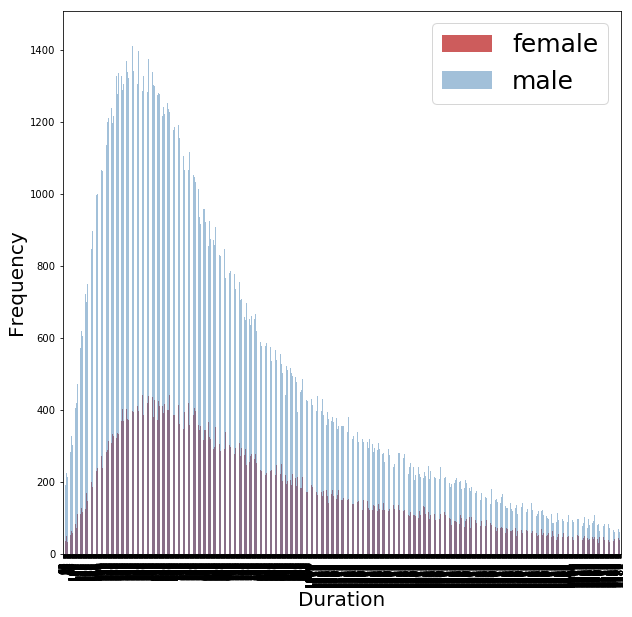

In [15]:
fig = pl.figure(figsize(10,10))

(((df2['tripduration'][df2['gender']==2].groupby([df2['tripduration']]).count()).plot(kind="bar",color='IndianRed',label='female')))

(((df2['tripduration'][df2['gender'] == 1].groupby([df2['tripduration']]).count()).plot(kind="bar",color='SteelBlue',alpha=0.5, label='male')))

pl.legend(fontsize=25)
pl.xlabel('Duration', fontsize=20)
pl.ylabel('Frequency',fontsize=20)

## Fig.2 Histogram with bin

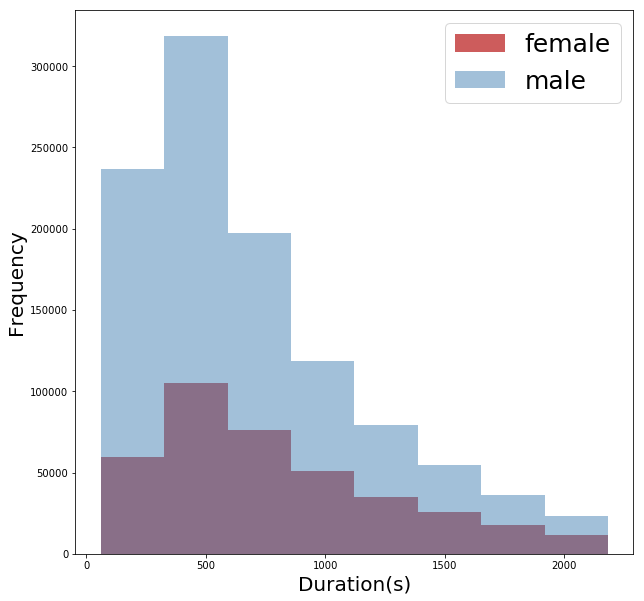

In [22]:
fig = pl.figure(figsize(10,10))

(df2[df2['gender']==2]['tripduration'].groupby([df2['gender']]).plot(bins = 8, kind="hist", color = 'IndianRed',label='female'))

(df2[df2['gender'] == 1]['tripduration'].groupby([df2['gender']]).plot(bins = 8,kind="hist", color= 'SteelBlue',label='male',alpha =0.5))

pl.legend(fontsize=25)
pl.xlabel('Duration(s)', fontsize=20)
pl.ylabel('Frequency',fontsize=20)
pl.show()